# Symmetric vs asymmetric parcellation


In [23]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
import hierarchical_clustering as cl
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt



In [24]:
figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"
atlas_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'


# Individual Parcellations

In [25]:
atlas = 'MNISymC2'
figsize = (20, 20)
model_pair = ['Models_03/NettekovenSym68_space-MNISymC2',
              'Models_03/NettekovenAsym68_space-MNISymC2']

# get individual parcellations (previously saved as pytorch tensor to save time. Use the export_uhats function in symmetry.py to recompute)
prob_a_indiv = pt.load(f'{ut.model_dir}/Models/{model_pair[0]}_Uhat.pt')
prob_b_indiv = pt.load(f'{ut.model_dir}/Models/{model_pair[1]}_Uhat.pt')

# Get parcels
parcels_indiv_a = np.array(prob_a_indiv.argmax(axis=1) + 1)
parcels_indiv_b = np.array(prob_b_indiv.argmax(axis=1) + 1)


In [26]:
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap_labels, labels = nt.read_lut(atlas_dir +
                                     'NettekovenSym68.lut')


In [27]:
# Zip the first dimensions of the two arrays together to get a list of parcellations 
# where the same subject's asymmetric and symmetric parcellations are next to each other

parcels_indiv = np.array(
    list(zip(parcels_indiv_a[0, :].tolist(), parcels_indiv_b[0, :].tolist())))

parcels_indiv = [(row1, row2)
                 for row1, row2 in zip(parcels_indiv_a, parcels_indiv_b)]
# Extract tuples (converting to float32 is temporary fix of flatmap issue)
parcels_indiv = [el.astype('float32') for pair in parcels_indiv for el in pair]


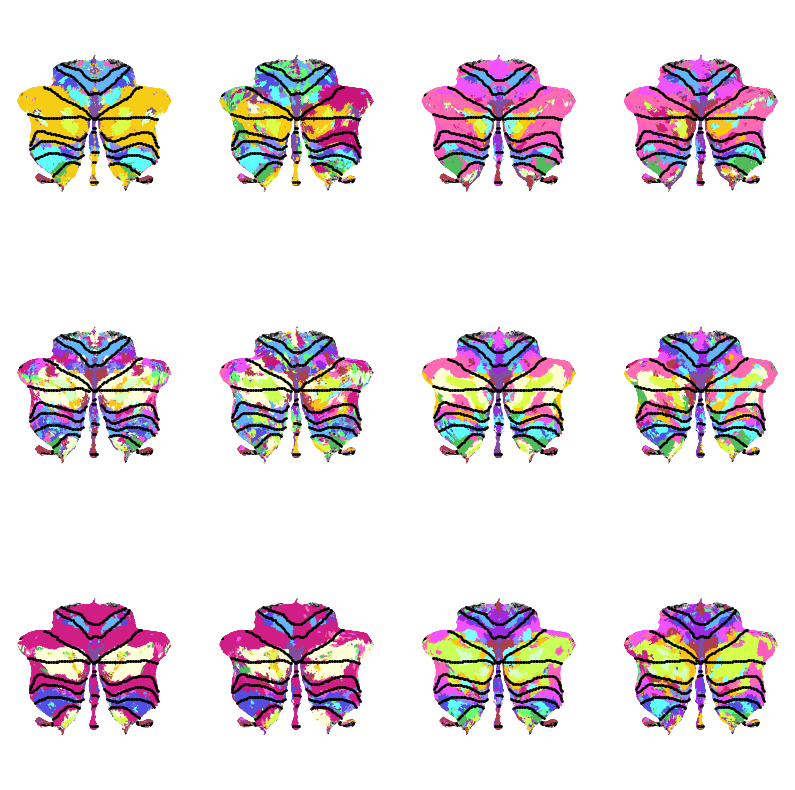

In [28]:
plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(parcels_indiv[:12], atlas,
                       dtype='label',
                       grid=(3, 4),
                       cmap=cmap_labels,
                       cscale=(0.3, 1),
                       colorbar=False)
plt.show()


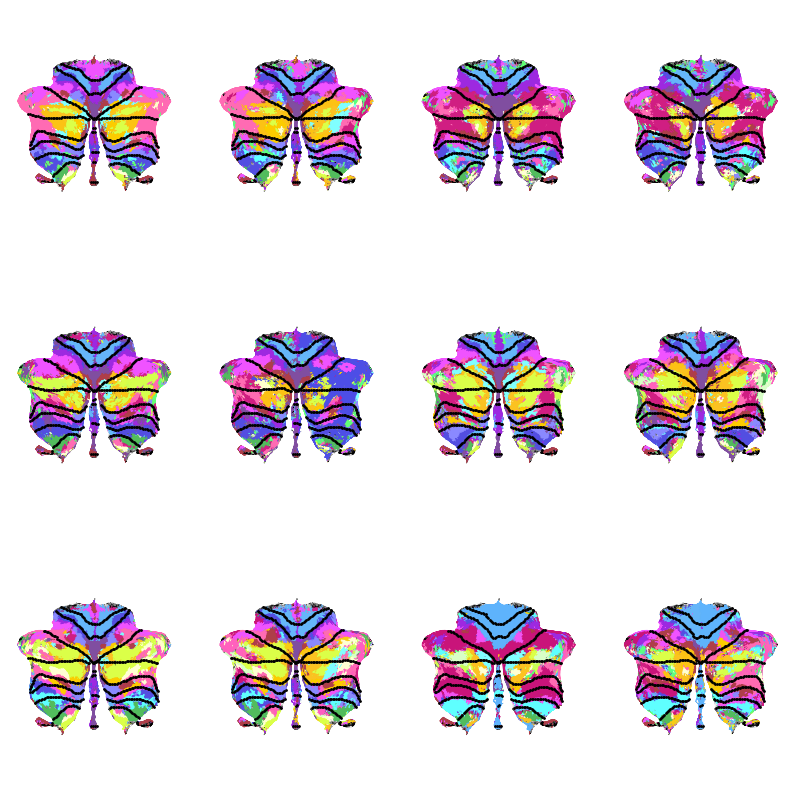

In [29]:

plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(parcels_indiv[12:24], atlas,
                        dtype='label',
                        grid=(3, 4),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)
plt.show()


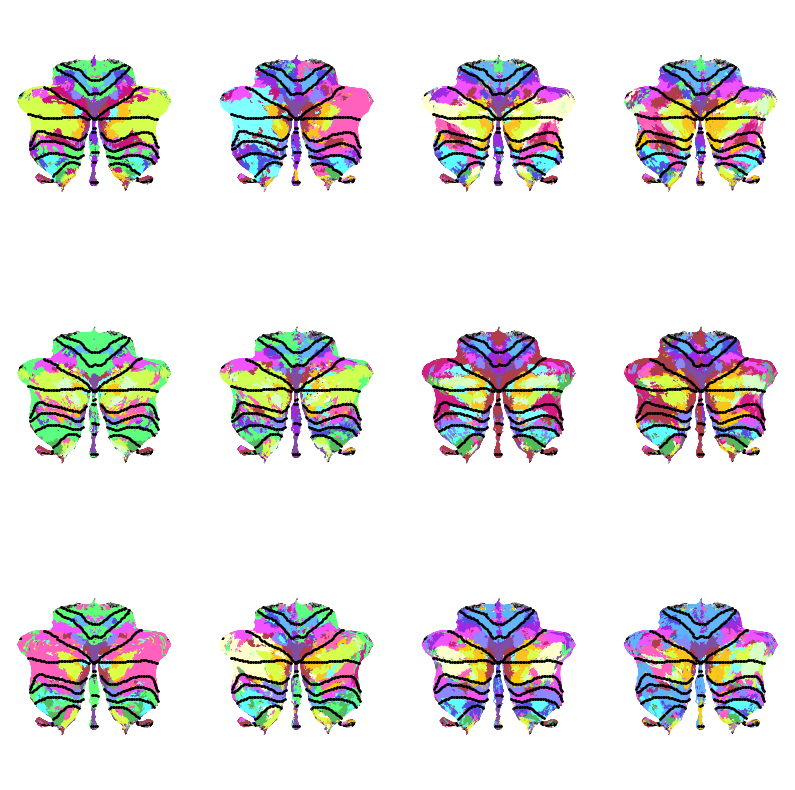

In [30]:

plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(parcels_indiv[24:36], atlas,
                        dtype='label',
                        grid=(3, 4),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)
plt.show()

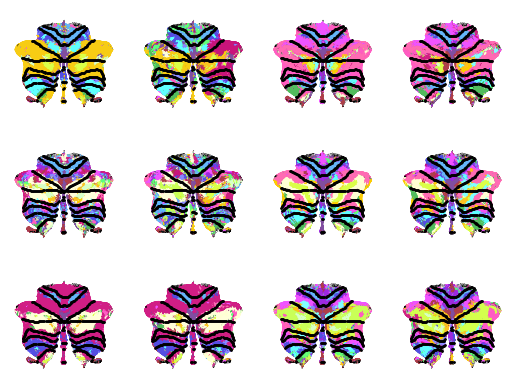

In [31]:
ax = ut.plot_multi_flat(parcels_indiv[:12], atlas,
                        dtype='label',
                        grid=(3, 4),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)


In [32]:

example_subj = [7, 8, 9]
indices = [int(el * 2) for el in example_subj]
indices = [(el, el + 1) for el in indices]
indices = [int(el) for pair in indices for el in pair]
subset = [parcels_indiv[i] for i in indices]


plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(3, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)


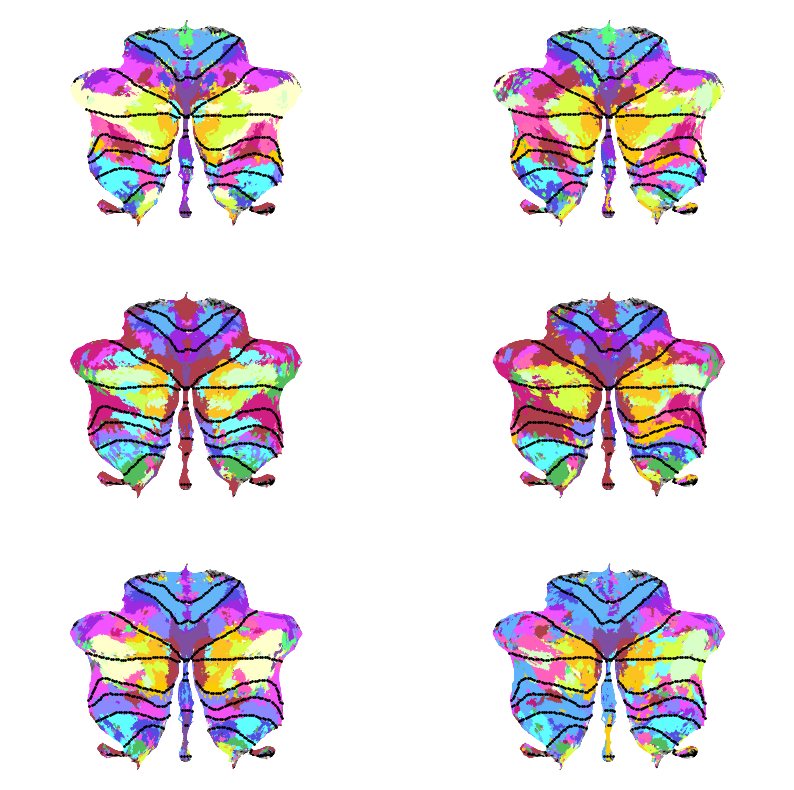

In [ ]:

# Plot Example subjects: 14, 16, 18
# get indices for subjects 14, 16, 18. 

example_subj = [13, 15, 17]
indices = [int(el * 2) for el in example_subj]
indices = [(el, el + 1) for el in indices]
indices = [int(el) for pair in indices for el in pair]
subset = [parcels_indiv[i] for i in indices]



plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(3, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)


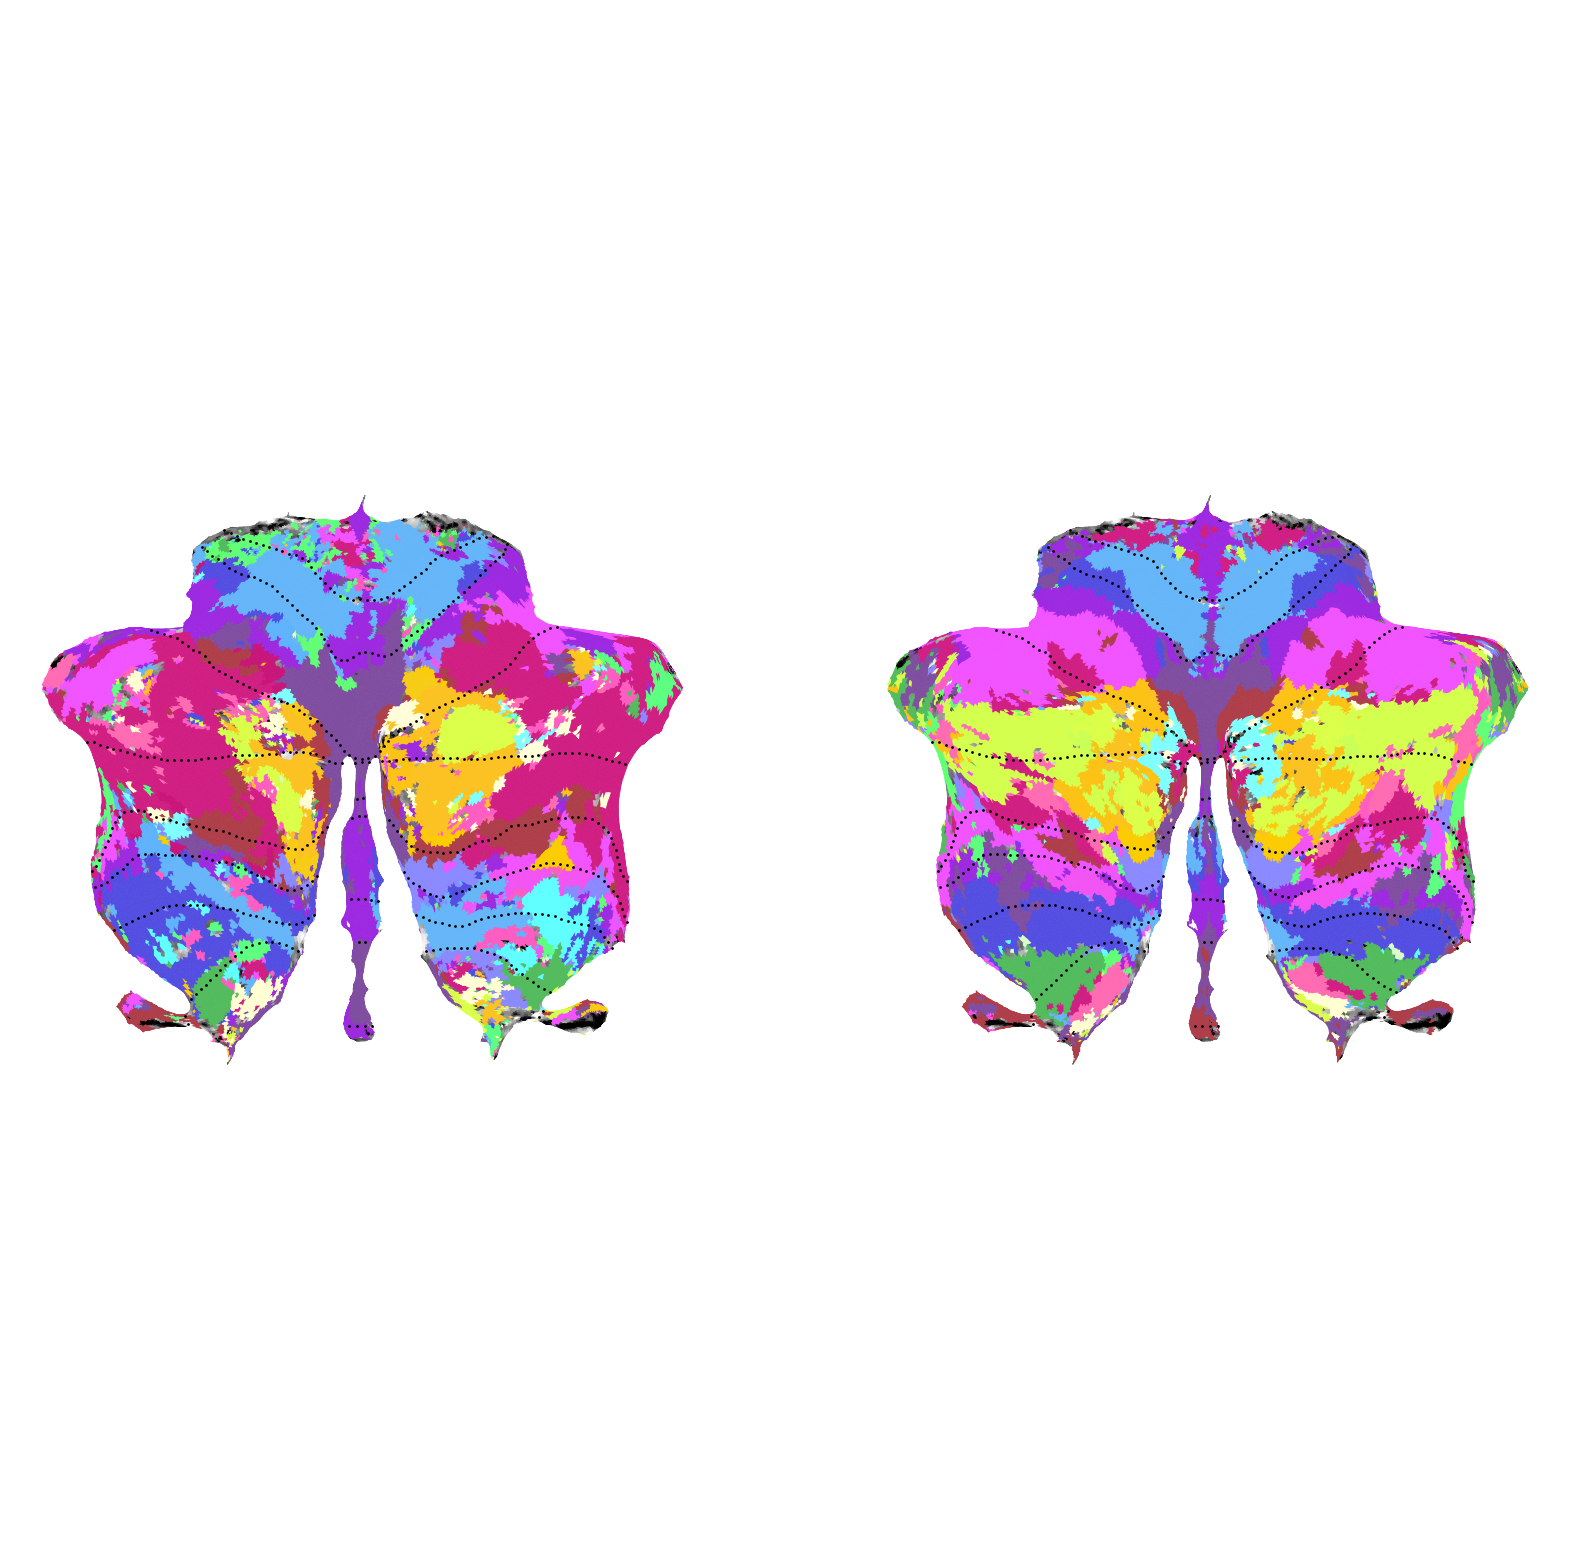

In [22]:
subset = [parcels_indiv[i] for i in [15,16]]


plt.figure(figsize=(20, 20))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)
plt.savefig(figure_path + f'Individual_parcellation_example01.png',
            dpi=300, bbox_inches='tight')


In [ ]:
subset = [parcels_indiv[i] for i in [17, 18]]


plt.figure(figsize=(20, 20))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)
plt.savefig(figure_path + f'Individual_parcellation_example01.png',
            dpi=300, bbox_inches='tight')
